# Homework 5
### Rachinskiy Maxim 175
#### Variant 9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Probit

import warnings
warnings.filterwarnings('ignore')

### Let's import data to analyse

In [2]:
grid = pd.read_csv('data/task_5.csv', sep=';', dtype='float')
data = grid[['low_9', 'age_9', 'smoke_9', 'ht_9', 'ui_9', 'race_9']]
data = data.rename(index=str, columns={'low_9':'low', 'age_9':'age', 'smoke_9':'smoke', \
                                       'ht_9':'ht', 'ui_9':'ui', 'race_9':'race'})
data.head()

,low,age,smoke,ht,ui,race
0,0.0,26.0,1.0,0.0,0.0,3.0
1,1.0,32.0,1.0,0.0,0.0,1.0
2,0.0,20.0,1.0,0.0,0.0,2.0
3,0.0,25.0,0.0,0.0,0.0,1.0
4,0.0,19.0,0.0,0.0,0.0,3.0


In [3]:
data.describe()

,low,age,smoke,ht,ui,race
count,150.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.313333,23.512500,0.381250,0.075000,0.137500,1.831250
std,0.465403,5.349411,0.487219,0.264218,0.345456,0.912677
min,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,23.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,26.250000,1.000000,0.000000,0.000000,3.000000
max,1.000000,45.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
data['race_1'] = (data.race == 1.0).astype('float')
data['race_2'] = (data.race == 2.0).astype('float')
data = data.drop('race', axis=1)

data.head()

,low,age,smoke,ht,ui,race_1,race_2
0,0.0,26.0,1.0,0.0,0.0,0.0,0.0
1,1.0,32.0,1.0,0.0,0.0,1.0,0.0
2,0.0,20.0,1.0,0.0,0.0,0.0,1.0
3,0.0,25.0,0.0,0.0,0.0,1.0,0.0
4,0.0,19.0,0.0,0.0,0.0,0.0,0.0


Now we can make train samples for the models

In [5]:
train = data.dropna()
x_train = np.array(train.drop('low', axis=1))
y_train = np.array(train['low'])

Let's build scatter plots for each of regressors 

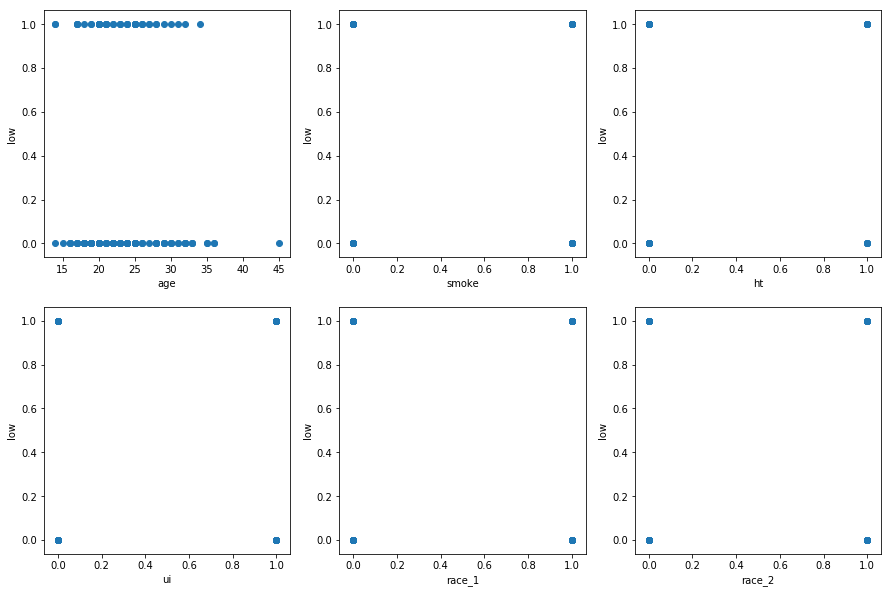

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15,10), squeeze=False)
columns = ['age', 'smoke', 'ht', 'ui', 'race_1', 'race_2']

for i in range(x_train.shape[1]):
    row, col = i // 3, i % 3
    axes[row, col].scatter(x_train[:, i], y_train)
    axes[row, col].set_xlabel(columns[i])
    axes[row, col].set_ylabel('low')

## Subtask 1

Firstly let's build ordinary linear regression to predict will child be underweight or not

$low = \beta_1 + \beta_2 * age + \beta_3 * smoke + \beta_4 * ht + \beta_5 * ui + \beta_6 * race_1 + \beta_7 * race_2$

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)

labels = np.array(lr.predict(x_train) > 0.5, dtype='float')

print('Recall:', recall_score(labels, y_train), '\nPrecision:', precision_score(labels, y_train))

Recall: 0.5714285714285714 
Precision: 0.3404255319148936


Now we will build logit regression

$low = \sigma (\beta_1 + \beta_2 * age + \beta_3 * smoke + \beta_4 * ht + \beta_5 * ui + \beta_6 * race_1 + \beta_7 * race_2)$

In [8]:
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

labels = logit_model.predict(x_train)

print('Recall:', recall_score(labels, y_train), '\nPrecision:', precision_score(labels, y_train))

Recall: 0.5238095238095238 
Precision: 0.23404255319148937


Finally we will build probit regression

$low = Ф (\beta_1 + \beta_2 * age + \beta_3 * smoke + \beta_4 * ht + \beta_5 * ui + \beta_6 * race_1 + \beta_7 * race_2)$

In [9]:
pr = Probit(y_train, x_train)
probit_model = pr.fit()

labels = np.array(probit_model.predict(x_train) > 0.5, dtype='float')

print('Recall:', recall_score(labels, y_train), '\nPrecision:', precision_score(labels, y_train))

Optimization terminated successfully.
         Current function value: 0.551833
         Iterations 5
Recall: 0.5483870967741935 
Precision: 0.3617021276595745


Looking on the results, we can say that there is no big difference between these models

## Subtask 2

Now let's analyse predictions of our models

In [10]:
x_test = np.array(data.drop('low', axis=1))
y_test = np.array(data['low'])

We will start with ordinary regression

Let's output 10 most likely to be underweighted childs with params of their mothers

In [11]:
y_predicted = lr.predict(x_test)

data.iloc[np.argsort(y_predicted)[::-1][:10]]

,low,age,smoke,ht,ui,race_1,race_2
19,1.0,20.0,1.0,0.0,1.0,0.0,0.0
143,0.0,21.0,1.0,0.0,1.0,0.0,0.0
112,1.0,28.0,1.0,0.0,1.0,0.0,0.0
95,1.0,34.0,1.0,1.0,0.0,0.0,1.0
11,0.0,19.0,1.0,1.0,0.0,1.0,0.0
68,0.0,19.0,1.0,1.0,0.0,1.0,0.0
98,1.0,21.0,1.0,1.0,0.0,1.0,0.0
71,1.0,21.0,1.0,1.0,0.0,1.0,0.0
141,0.0,22.0,0.0,1.0,0.0,0.0,0.0
106,1.0,24.0,0.0,1.0,0.0,0.0,0.0


As we see from the results most dangerous portrait is

Smoking young woman with ht or ui problems

Now let's focuse on differences between predicted values and real values

Here is 10 wrong answers of the model

In [12]:
data.iloc[np.argsort(np.abs(y_predicted - y_test))[::-1][10:20]]

,low,age,smoke,ht,ui,race_1,race_2
74,1.0,24.0,0.0,0.0,0.0,1.0,0.0
80,1.0,17.0,0.0,0.0,0.0,0.0,1.0
143,0.0,21.0,1.0,0.0,1.0,0.0,0.0
40,1.0,27.0,0.0,0.0,0.0,0.0,0.0
37,1.0,26.0,0.0,0.0,0.0,0.0,0.0
125,1.0,25.0,0.0,0.0,0.0,0.0,0.0
23,1.0,25.0,0.0,0.0,0.0,0.0,0.0
124,1.0,25.0,0.0,0.0,0.0,0.0,0.0
15,1.0,23.0,0.0,0.0,0.0,0.0,0.0
148,1.0,21.0,0.0,0.0,0.0,0.0,0.0


As we can see, problems happen when there is no specific information about mothers - when they don't have health problems or smoke addiction

Now we can move to logit regression

We will do the same analyse

In [13]:
y_predicted = logit_model.predict(x_test)

data.iloc[np.argsort(y_predicted)[::-1][:10]]

,low,age,smoke,ht,ui,race_1,race_2
19,1.0,20.0,1.0,0.0,1.0,0.0,0.0
61,1.0,20.0,1.0,0.0,1.0,1.0,0.0
98,1.0,21.0,1.0,1.0,0.0,1.0,0.0
97,1.0,20.0,0.0,0.0,1.0,0.0,0.0
133,1.0,19.0,1.0,0.0,1.0,1.0,0.0
54,0.0,18.0,1.0,0.0,1.0,1.0,0.0
95,1.0,34.0,1.0,1.0,0.0,0.0,1.0
102,1.0,14.0,1.0,0.0,0.0,0.0,0.0
114,0.0,20.0,0.0,0.0,1.0,0.0,0.0
50,1.0,22.0,1.0,0.0,1.0,1.0,0.0


Just as the previous model, logit regression tries to predict desease basing on smoke addiction or some health problems

In [14]:
data.iloc[np.argsort(np.abs(y_predicted - y_test))[::-1][10:20]]

,low,age,smoke,ht,ui,race_1,race_2
114,0.0,20.0,0.0,0.0,1.0,0.0,0.0
109,1.0,26.0,1.0,0.0,0.0,1.0,0.0
60,0.0,20.0,0.0,0.0,1.0,0.0,0.0
23,1.0,25.0,0.0,0.0,0.0,0.0,0.0
18,1.0,14.0,0.0,0.0,0.0,0.0,0.0
77,1.0,30.0,1.0,0.0,0.0,1.0,0.0
116,1.0,20.0,1.0,0.0,0.0,1.0,0.0
75,1.0,21.0,0.0,0.0,0.0,0.0,0.0
74,1.0,24.0,0.0,0.0,0.0,1.0,0.0
106,1.0,24.0,0.0,1.0,0.0,0.0,0.0


Problems happen when there is no specific information about mothers - when they don't have health problems or smoke addiction

Finally, let's consider probit regression 

We will do the same analyse

In [15]:
y_predicted = probit_model.predict(x_test)

data.iloc[np.argsort(y_predicted)[::-1][:10]]

,low,age,smoke,ht,ui,race_1,race_2
19,1.0,20.0,1.0,0.0,1.0,0.0,0.0
143,0.0,21.0,1.0,0.0,1.0,0.0,0.0
112,1.0,28.0,1.0,0.0,1.0,0.0,0.0
68,0.0,19.0,1.0,1.0,0.0,1.0,0.0
11,0.0,19.0,1.0,1.0,0.0,1.0,0.0
95,1.0,34.0,1.0,1.0,0.0,0.0,1.0
98,1.0,21.0,1.0,1.0,0.0,1.0,0.0
71,1.0,21.0,1.0,1.0,0.0,1.0,0.0
102,1.0,14.0,1.0,0.0,0.0,0.0,0.0
141,0.0,22.0,0.0,1.0,0.0,0.0,0.0


As we can see probit regression depends first of all on smoke addiction

In [16]:
data.iloc[np.argsort(np.abs(y_predicted - y_test))[::-1][10:20]]

,low,age,smoke,ht,ui,race_1,race_2
74,1.0,24.0,0.0,0.0,0.0,1.0,0.0
143,0.0,21.0,1.0,0.0,1.0,0.0,0.0
1,1.0,32.0,1.0,0.0,0.0,1.0,0.0
132,1.0,31.0,1.0,0.0,0.0,1.0,0.0
77,1.0,30.0,1.0,0.0,0.0,1.0,0.0
80,1.0,17.0,0.0,0.0,0.0,0.0,1.0
134,1.0,29.0,0.0,0.0,1.0,1.0,0.0
40,1.0,27.0,0.0,0.0,0.0,0.0,0.0
10,1.0,28.0,1.0,0.0,0.0,1.0,0.0
37,1.0,26.0,0.0,0.0,0.0,0.0,0.0


Problems happen when there is no specific information about mothers - when they don't have health problems or smoke addiction

## Subtask 3

Now let's find best threshold for our ordinary regression

For that needs, we will build a plot with sensitivity and specificity curve

In [17]:
def get_sensitivity(y_predicted, y_real):
    return np.sum(y_predicted * y_real) / np.sum(y_real)

def get_specificity(y_predicted, y_real):
    return np.sum((1 - y_predicted) * (1 - y_real)) / np.sum(1 - y_real)

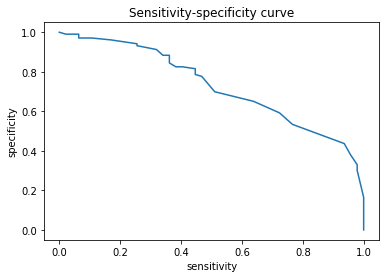

In [18]:
thresholds = np.linspace(0, 1, 100)
y_predicted = lr.predict(x_train)

sensitivities = [get_sensitivity(np.array(y_predicted > threshold, dtype='float'), y_train) for threshold in thresholds]
specificities = [get_specificity(np.array(y_predicted > threshold, dtype='float'), y_train) for threshold in thresholds]

plt.plot(sensitivities, specificities)
plt.xlabel('sensitivity')
plt.ylabel('specificity')
plt.title('Sensitivity-specificity curve');

Let's find what threashold could be, if sensitivity is greater than 0.75

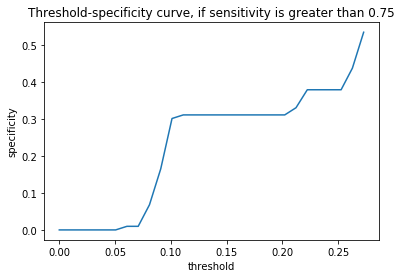

In [19]:
mask = np.array(sensitivities) > 0.75

plt.plot(thresholds[mask], np.array(specificities)[mask])
plt.xlabel('threshold')
plt.ylabel('specificity')
plt.title('Threshold-specificity curve, if sensitivity is greater than 0.75');